In [ ]:
# Yihao Zhong Larry, yz7654, date: 03/09/2024 - onwards
#

## Problem 1 -  Convolutional Neural Networks Architectures

### 1.1. total parameters


First conv layer: it uses 96 kernels of size of $11*11*3$ with a stride of 4, so total is $(11*11)*3*96 + 96 = 34944$.

Second conv layer: it uses 256 kernels of size of $5*5*48*2$, so total is $(5*5)*96*256 + 256 = 614656$.

Third conv layer: it uses 384 kernels of size of $3*3*256$, so total is $(3*3)*256*384 + 384 = 885120$.

Fourth conv layer: it uses 384 kernels of size of $3*3*192*2$, so total is $(3*3)*384*384 + 384 = 1327488$.

Fifth conv layer: it uses 96 kernels of size of $3*3*192*2$, so total is $(3*3)*384*256 + 256 = 884992$.

Fully-connected layer 1 (4096 neurons each): $(6*6)*256*4096 + 4096 = 37752832$

Fully-connected layer 2 (4096 neurons each): $(4096 + 1) * 4096 = 16781312$

Fully-connected layer 2 (4096 neurons each): $(4096 + 1) * 1000 = 4097000$

All params: $$34944+614656+885120+1327488+884992+37752832+16781312+4097000 = 62378344$$

This aligned with the paper statement: "Our neural network architecture has 60 million parameters".

### 1.2.

In [1]:

input_dimensions = (224, 224)
input_channels = 3

# Format: (num_filters, filter_size, stride, padding)
layers = [
    ("CONV3-64", 64, 3, 1, 1),
    ("CONV3-64", 64, 3, 1, 1),
    ("POOL2", 64, 2, 2, 0),
    ("CONV3-128", 128, 3, 1, 1),
    ("CONV3-128", 128, 3, 1, 1),
    ("POOL2", 128, 2, 2, 0),
    ("CONV3-256", 256, 3, 1, 1),
    ("CONV3-256", 256, 3, 1, 1),
    ("CONV3-256", 256, 3, 1, 1),
    ("CONV3-256", 256, 3, 1, 1),
    ("POOL2", 256, 2, 2, 0),
    ("CONV3-512", 512, 3, 1, 1),
    ("CONV3-512", 512, 3, 1, 1),
    ("CONV3-512", 512, 3, 1, 1),
    ("CONV3-512", 512, 3, 1, 1),
    ("POOL2", 512, 2, 2, 0),
    ("CONV3-512", 512, 3, 1, 1),
    ("CONV3-512", 512, 3, 1, 1),
    ("CONV3-512", 512, 3, 1, 1),
    ("CONV3-512", 512, 3, 1, 1),
    ("POOL2", 512, 2, 2, 0)
]

#  dimensions, activations, and parameters
output_dimensions = input_dimensions
activations = []
parameters = []

#
for layer in layers:
    name, num_filters, filter_size, stride, padding = layer
    if "CONV" in name:
        # For convolutional layers
        output_dimensions = (int((output_dimensions[0] + 2*padding - filter_size) / stride + 1),
                             int((output_dimensions[1] + 2*padding - filter_size) / stride + 1))
        # Activation units
        activations.append(output_dimensions[0] * output_dimensions[1] * num_filters)
        # Parameters
        parameters.append((filter_size * filter_size * input_channels) * num_filters)
        input_channels = num_filters  # Update for the next layer
    elif "POOL" in name:
        # For pooling layers
        output_dimensions = (int((output_dimensions[0] - filter_size) / stride + 1),
                             int((output_dimensions[1] - filter_size) / stride + 1))

        activations.append(output_dimensions[0] * output_dimensions[1] * num_filters)

        parameters.append(0)


print(sum(activations), sum(parameters))


16382464 20018880


We calculate using the code above, and give the rendered table below.

Parameters for a layer are calculated using the formula:
(filter height*filter width * input depth + 1) * number of filters. But we do not +1 because we do not count bias. For convolutional layers, the input depth corresponds to the number of channels in the input feature map, and for fully connected layers, it is number of inputs to the neuron.



| Layer           | Number of Activations (Memory) | Parameters (Compute) |
|:----------------|:-------------------------------|---------------------:|
| Input           | $224*224*3$=150K                | 0                    |
| CONV3-64        | $224*224*64$=3.2M                | $(3*3*3)*64$ = 1,728  |
| CONV3-64        | $224*224*64$=3.2M              | $(3*3*64)*64$ = 36,864 |
| POOL2           | $112*112*64$=800K                 | 0                    |
| CONV3-128       | 1,605,632                       | 73,728               |
| CONV3-128       | 1,605,632                       | 147,456              |
| POOL2           | 401,408                         | 0                    |
| CONV3-256       | 802,816                         | 294,912              |
| CONV3-256       | 802,816                         | 589,824              |
| CONV3-256       | 802,816                         | 589,824              |
| CONV3-256       | 802,816                         | 589,824              |
| POOL2           | 200,704                         | 0                    |
| CONV3-512       | 401,408                         | 1,179,648            |
| CONV3-512       | 401,408                         | 2,359,296            |
| CONV3-512       | 401,408                         | 2,359,296            |
| CONV3-512       | 401,408                         | 2,359,296            |
| POOL2           | 100,352                         | 0                    |
| CONV3-512       | 100,352                         | 2,359,296            |
| CONV3-512       | 100,352                         | 2,359,296            |
| CONV3-512       | 100,352                         | 2,359,296            |
| CONV3-512       | 100,352                         | 2,359,296            |
| POOL2           | 25,088                          | 0                    |
| FC              | 4096                            | $4096*4096$ = 16,777,216|
| FC              | 4096                            | $4096*4096$ = 16,777,216|
| FC              | 1000                            | $4096*1000$ = 4,096,000 |
| TOTAL           | 16541656                         |     57669312 (57M)           |


### 1.3

**Base case: (N=1):**

For the first layer (N=1), the receptive field (RF) is F. This is because the filter directly on F pixel in the output. So N = 1 give $RF = F$.

**Base case 2: (N = 2):**

Each filters also touch on F pixel. The input to this layer is the output of the previous layer. The first layer already had a receptive field of F, and now, because we're going one step further for each pixel the second layer's filter touches, we add F-1 additional pixel to RF.

Thus for N = 2, the $RF = F + (F-1) = 2F-1$

**General case: math induction**

Extending this logic to N layers, each additional layer adds F-1 pixels to each side of the receptive field because it goes one step further in the input it receives from the output of all previous layers combined. So, the RF after N layer is $N*(F-1)$ for both sides. For each layer we add F-1 to RF, the total sum is $(N-1) * (F-1)$. Then we plus the original F, we have $$F = RF = F+(N-1)*(F-1) = F+NF-F-N + 1 = NF-N+1$$

Therefore, the effective receptive field for a stack of N convolution layers, each with a filter size of $F*F$ is the same as having a a single convolution layer with a filter size of $(NF-N+1) * (NF-N+1)$

**For 3 filters of size 5*5:**

$$RF = (NF-N+1) = 3*5 -3 + 1 = 13$$

So the receptive field of 3 stacked convolutional layers, each with a filter size of 5 * 5 is equal to a single layer of a filter size of 13 * 13.

### 1.4.a

The general idea behind designing an inception module in a convolutional neural network is to allow the network to choose from a variety of convolutions at each layer. Basic rule is that,  there is no one-size-fits-all when it comes to the size of the filters in convolutional layers and different sizes can capture different kinds of information from the input images. Therefore, it has convolutional filters of varying sizes alongside pooling operations, enabling the network to capture and process information at multiple scales within the same layer for more efficient and a very flexible feature extraction.

### 1.4.b

Output size of naive is (32, 32, 672) , output size of reduce is (32, 32, 480)

Each filter:

**For the naive inception**

1x1 convolutions: $32 * 32 * 128$

3x3 convolutions: $32 * 32 * 192$

5x5 convolutions: $32 * 32 * 96$

pooling: $ 32 * 32 * 256$

Sum is: $$ 128 + 192 + 96 + 256 = 672$$, so the naive concat_depth is 672

**For the dimension reduction inception:**
1x1 convolutions: $32 * 32 * 128$

1x1 convolutions (before 3x3): $32 * 32 * 128$

3x3 convolutions (after reduction): $32 * 32 * 192$

1x1 convolutions (before 5x5): $32 * 32 * 32$

5x5 convolutions (after reduction): $32 * 32 * 96 $

1x1 convolutions (after pooling): $32 * 32 * 64$

pooling: $ 32 * 32 * 256$

Sum is $$ 128+192+96+64 = 480$$, so the reduction concat_depth is 480.


### 1.4.c

ops=output height * output width * number of filters * filter height * filter width * input depth

**For the naive inception**

1x1 convolutions: $32 * 32 * 128 * 1 * 1 * 256 = 33554432$ ops

3x3 convolutions: $32 * 32 * 192 * 3 * 3 * 256 = 452984832$ ops

5x5 convolutions: $32 * 32 * 96 * 5 * 5 * 256 = 629145600$ ops

Sum is: $$ 33554432  + 452984832 + 629145600 = 1115684864 = 1.11B$$

**For the dimension reduction inception:**
1x1 convolutions: $32 * 32 * 128 * 1 * 1 * 256 = 33554432$ ops

1x1 convolutions (before 3x3): $32 * 32 * 128 * 1 * 1 * 256 = 33554432$ ops

3x3 convolutions (after reduction): $32 * 32 * 192 * 3 * 3 * 128 = 226492416$ ops

1x1 convolutions (before 5x5): $32 * 32 * 32 * 1 * 1 * 256 = 8388608$ ops

5x5 convolutions (after reduction): $32 * 32 * 96 * 5 * 5 * 32 = 78643200$ ops

1x1 convolutions (after pooling): $32 * 32 * 64 * 1 * 1 * 256 = 16777216$ ops

Sum is $$ 33554432*2 + 226492416 + 8388608 + 78643200 + 16777216 = 397410304 = 39.7M$$


### 1.4.d

The problem with the naive architecture is that it is computationally expensive. This is due to the direct application of large numbers of large filters like a 5*5 conv layer. Each convolution operation is a multiplicative process; Pooling layer also preserves feature depth,
which means total depth after
concatenation can only grow at every
layer. therefore, more filters and larger filters with greater input depth lead to a much higher number of operations, which increases computational load.

Reduction architecture helps deal with the problem by reducing the depth of the input space before applying the 3*3 and 5*5 convolutions. This is first using 1*1 convolutions, which are computationally cheaper due to their smaller size. Bottleneck (1 * 1) can also reduce depth after pooling
layer. By reducing the number of input channels (depth) that the larger filters have to process, the network can significantly decrease on the number of multiplicative operations.

$ 1115684864 - 397410304 = 718274560 = 71.8M$. The computational saving is very large, which is about a 65% reduction from naive to reduction architectures. This demonstrates the effective of dimensionality reduction in making deep neural network architectures more efficient.

### 1.5.a

The main difference between Fast R-CNN and Faster R-CNN is in how they propose regions for object detection. Fast R-CNN relies on external methods for region proposal, which can be slow and inefficient, often becoming a bottleneck in the object detection process. Faster R-CNN, on the other hand, has a Region Proposal Network (RPN) that shares full-image convolutional features with the detection network, enabling nearly cost-free region proposals​​.

An RPN is a fully convolutional network (FCN) that predicts object bounds and objectness scores at each position on the image in a sliding-window manner. The introduction of RPN allows for the generation of high-quality region proposals that are used by Fast R-CNN for detection. Basically, the integration of RPN into the detection process significantly speeds up the region proposal step, making Faster R-CNN much faster.


### 1.5.b

The architecture of a Region Proposal Network (RPN) in Faster R-CNN is for generate high-quality region proposals that are then used for object detection. The RPN is implemented as a fully convolutional network FCN that do the convolutional feature map produced by the initial layers of the Faster R-CNN architecture​​.

Most important component of the RPN is of course Sliding Window: The RPN scans over the feature map using a small network (a kind of mini-network) that slides across the feature map. This sliding window approach enables the RPN to evaluate every location in the image. Then you have anchors: for each sliding window position, the RPN uses multiple predefined boxes called "anchors". These anchors are of various scales and aspect ratios, allowing the RPN to detect objects of different sizes and shapes.

For each anchor, the RPN predicts two sets of output: objectness scores (how likely an anchor is to contain an object) and bounding box regressions (corrections to be applied to the anchor to better fit the object). Then we have the classification and regression kayers: the mini-network includes a classification layer for predicting the objectness score and a regression layer for predicting the bounding box adjustments.

Last is the sharing convolutional features of RPN: shares convolutional features with the detection network, allowing for a significant reduction in computation time. This shared feature approach has the "attention", where the RPN guides the detection network to focus on areas of interest.



### 1.5.c



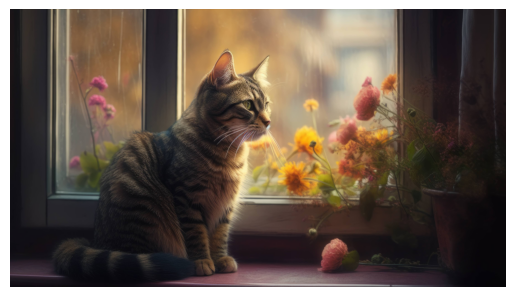

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("content/a-cat-sitting-on-a-window-sill-looking-out-a-window-o3fzfveu.jpeg")
plt.imshow(img)
plt.axis('off')
plt.show()


Image: an image with various objects, a cat sitting next to a window and a plant on the windowsill.

**Convolutional Feature Map:**

The entire image is passed through several convolutional layers (share with the detection network), which create a high-dimensional feature map. This map encodes complex visual features extracted from the image at various locations and scales.

**Sliding Window on Feature Map:**

The RPN scans the convolutional feature map using a small network. This network slides over the feature map position by position, acting as a fixed-size window (e.g., 3x3).

At each sliding window position,you have anchors. Anchors different in scale and aspect ratio to cover different object shapes and sizes. For example, for the example image, we might have anchors that fit the general size and shape of the cat, the window, and the plant.

**Objectness Scores and Bounding Box:**

For each anchor, the RPN predict objectness score indicating how likely the anchor contains an object. Adjustments to the anchor’s coordinates that would better fit the object it overlaps. These adjustments are made to the anchor's position, height, and width.


**Non-Maximum Suppression:**

because multiple anchors can overlap significantly, the RPN uses NMS to reduce redundancy. Anchors with high objectness scores are kept, while those that overlap significantly with a higher scoring anchor are discarded.

**Region Proposals:**

The remaining anchors are the final set of region proposals. These proposals indicate regions in the image where there is a high likelihood of finding objects.

**Forwarded for Detection:**

The region proposals now passed to the Fast R-CNN detector, which give each proposed region to determine the presence and class of objects within those regions.



### 1.5.d

A Faster R-CNN use Non-Maximum Suppression (NMS). NMS is object detection pipelines to have each object is detected only once, even if multiple similar proposals for that object are generated.

NMS has a score ranking: each region proposal generated by the RPN comes with an objectness score. The first step of NMS is to sort all proposals by their scores in descending. Then you have proposal comparison, starting with the highest score, NMS compares this proposal with all other to identify overlaps. Overlap is typically measured using the Intersection over Union (IoU) metric, which calculates the area of overlap between two proposals divided by the area of their union.

If the IoU between the highest scoring proposal and another proposal exceeds a certain threshold, like 0.7 is considered redundant and removed from consideration. We assume proposals with high overlap are likely targeting the same object.

Then we have the iteration. The highest score is then added to the final list of proposals, and it is removed from the list to be considered in next comparisons. The next high scoring proposal that has not been removed becomes the new reference proposal.

**Example:**

Imagine an image with a cat sitting on a mat. The RPN generates multiple region proposals around the cat, with some proposals closely surrounding the cat and others slightly offset but still overlapping.

Proposal A is the cat and has the highest object score.
Proposals B, C, and D also surround the cat but are a bit larger, smaller, or shifted, and have a little lower scores.


Then we applying NMS:

A is compared with B, C, and D. Suppose all have an IoU with A greater than the threshold.

Since A has the highest score, B, C, and D are removed for having high overlap with A.

A is then added to the final list of proposals.

The process repeats for the next highest score proposals until no proposals are left to compare or the desired number of proposals (e.g., 2000) is reached.


## Problem 2 -  Transfer learning: Shallow learning vs Finetuning, Pytorch

### 2.1.

In [ ]:
pip install torch torchvision

In [ ]:
!unzip /content/vgg-flowers.zip

Number of the images class 102
Example naming of the images class ['0001', '0002', '0003', '0004', '0005']
dataset size is  {'train': 1020, 'val': 1020}


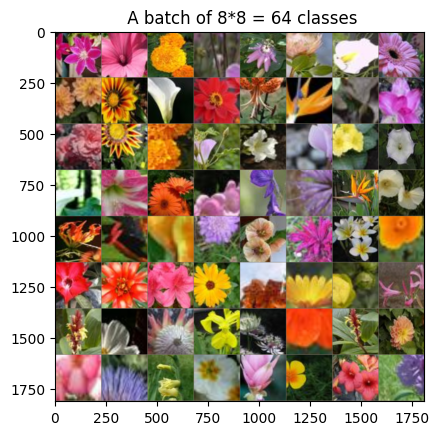

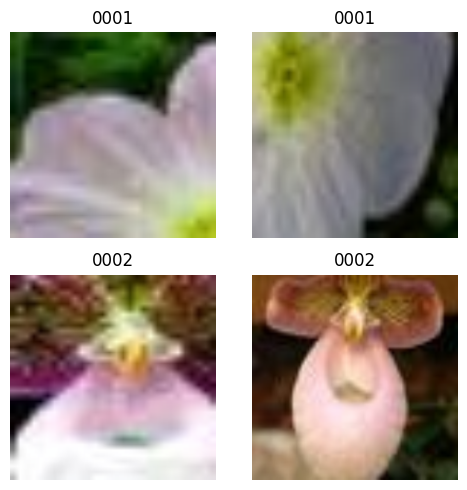

<Figure size 640x480 with 0 Axes>

Number of images per class: [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]...
Number of images per class: [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]...


In [ ]:
import torch, torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import DataLoader, Dataset
import json
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Transformations
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'content/vgg-flowers'
image_datasets = {
    'train': datasets.ImageFolder(os.path.join(data_dir, 'train'), data_transforms['train']),
    'val': datasets.ImageFolder(os.path.join(data_dir, 'val'), data_transforms['val'])
}
# use a batch size of 64:
dataloaders = {
    'train': DataLoader(image_datasets['train'], batch_size=64, shuffle=True),
    'val': DataLoader(image_datasets['val'], batch_size=64, shuffle=True)
}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

print("Number of the images class", len(class_names))

print("Example naming of the images class", class_names[:5])

print("dataset size is ",dataset_sizes)

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

# Get a batch of training data and show images
inputs, classes = next(iter(dataloaders['train']))
out = torchvision.utils.make_grid(inputs)
imshow(out, title= " A batch of 8*8 = 64 classes") # show a batch



fig, axs = plt.subplots(2, 2, figsize=(5, 5))  # Setup a grid for 4 images
images_so_far = 0

for i, (inputs, labels) in enumerate(dataloaders['train']):
    for j in range(inputs.size(0)):
        label = labels[j].item()
        class_name = class_names[label]

        if label <= 1:
            ax = axs[label, images_so_far % 2]
            image = inputs[j].cpu()

            # Convert image to numpy and display
            image = image.numpy().transpose((1, 2, 0))
            mean = np.array([0.485, 0.456, 0.406])
            std = np.array([0.229, 0.224, 0.225])
            image = std * image + mean
            image = np.clip(image, 0, 1)

            ax.imshow(image)
            ax.set_title(class_name)
            ax.axis('off')

            images_so_far += 1
            if images_so_far >= 4:  # Once we have 4 images, break out of all loops
                plt.tight_layout()
                plt.show()
                break
    if images_so_far > 4:
        break



def describe_dataset(dataset):
    class_distribution = {}
    for _, label in dataset:
        if label in class_distribution:
            class_distribution[label] += 1
        else:
            class_distribution[label] = 1
    num_classes = len(class_distribution)
    print(f"Number of images per class: {list(class_distribution.values())[:10]}...")  # Displaying first 10 for brevity

describe_dataset(image_datasets['train'])
describe_dataset(image_datasets['val'])

In [ ]:
model = models.resnet50(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs, 102) # len(dataloaders['train'].classes)
"""
This line modifies the final layer of the pre-trained ResNet50 model to have an output size of 102,
which matches the number of classes in the vgg-flowers dataset.
"""

'\nThis line modifies the final layer of the pre-trained ResNet50 model to have an output size of 102, \nwhich matches the number of classes in the vgg-flowers dataset.\n'

The dataset use is vgg-flowers, it has 102 classes, each classes has 10 samples, respectively in training and val dataset. In total the training and validation has 1020 samples. The classes are name from 1 to 103, meaning 102 different flower types or flower catergories. As shown above, a sample graph of the flower is shown for demo of the target dataset visualization.

### 2.1.b

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    print("Using GPU")
else:
    print("Using CPU")

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# multistep learning rate schedules
scheduler = lr_scheduler.MultiStepLR(optimizer, milestones=[15, 30, 45], gamma=0.1)


model.to(device)

train_loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []


def train_model(model, criterion, optimizer, scheduler, num_epochs=60):
    train_loss_history = []
    val_loss_history = []
    train_acc_history = []
    val_acc_history = []
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # Backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)
            epoch_acc = epoch_acc.cpu().item()

            if phase == 'train':
                train_loss_history.append(epoch_loss)
                train_acc_history.append(epoch_acc)
            else:
                val_loss_history.append(epoch_loss)
                val_acc_history.append(epoch_acc)

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # Deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

    print(f'Best val Acc: {best_acc:4f}')

    # Load best model weights
    model.load_state_dict(best_model_wts)
    return model, train_loss_history, val_loss_history, train_acc_history, val_acc_history

import copy
import time

# Train and evaluate
start_time = time.time()
model_ft, train_loss_history, val_loss_history, train_acc_history, val_acc_history = train_model(model, criterion, optimizer, scheduler, num_epochs=60)
end_time = time.time()
print(f"Training complete in {(end_time - start_time) // 60:.0f}m {(end_time - start_time) % 60:.0f}s")


Using GPU
Epoch 1/60
----------
train Loss: 4.6821 Acc: 0.0127
val Loss: 4.6060 Acc: 0.0108
Epoch 2/60
----------
train Loss: 4.5930 Acc: 0.0176
val Loss: 4.5005 Acc: 0.0431
Epoch 3/60
----------
train Loss: 4.4906 Acc: 0.0559
val Loss: 4.3999 Acc: 0.1069
Epoch 4/60
----------
train Loss: 4.3799 Acc: 0.1167
val Loss: 4.2638 Acc: 0.1804
Epoch 5/60
----------
train Loss: 4.2517 Acc: 0.1735
val Loss: 4.0951 Acc: 0.2402
Epoch 6/60
----------
train Loss: 4.0823 Acc: 0.2657
val Loss: 3.9061 Acc: 0.3235
Epoch 7/60
----------
train Loss: 3.9005 Acc: 0.3265
val Loss: 3.6731 Acc: 0.3716
Epoch 8/60
----------
train Loss: 3.6957 Acc: 0.3980
val Loss: 3.4502 Acc: 0.3853
Epoch 9/60
----------
train Loss: 3.5271 Acc: 0.4284
val Loss: 3.2512 Acc: 0.4157
Epoch 10/60
----------
train Loss: 3.3422 Acc: 0.4588
val Loss: 3.0610 Acc: 0.4539
Epoch 11/60
----------
train Loss: 3.1515 Acc: 0.4833
val Loss: 2.8915 Acc: 0.4637
Epoch 12/60
----------
train Loss: 2.9973 Acc: 0.4971
val Loss: 2.7418 Acc: 0.4931
Epo

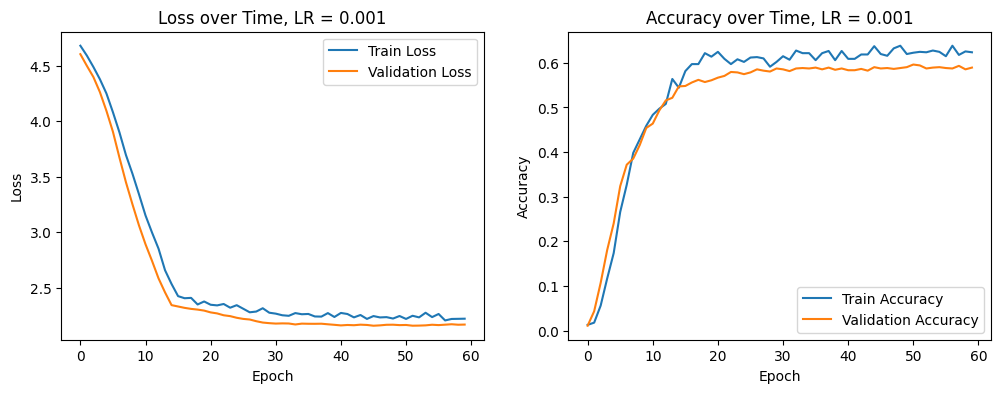

In [ ]:
def plot_res (train_loss_history, val_loss_history, train_acc_history, val_acc_history, lr):
  plt.figure(figsize=(12, 4))
  plt.subplot(1, 2, 1)
  plt.plot(train_loss_history, label='Train Loss')
  plt.plot(val_loss_history, label='Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title(f'Loss over Time, LR = {lr}')
  plt.legend()


  plt.subplot(1, 2, 2)
  plt.plot(train_acc_history, label='Train Accuracy')
  plt.plot(val_acc_history, label='Validation Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.title(f'Accuracy over Time, LR = {lr}')
  plt.legend()

  plt.show()

  return

plot_res(train_loss_history, val_loss_history, train_acc_history, val_acc_history, 0.001)

### 2.1.c

Running experiment with LR=0.01


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/60
----------
train Loss: 4.6522 Acc: 0.0196
val Loss: 4.2502 Acc: 0.0990
Epoch 2/60
----------
train Loss: 3.8667 Acc: 0.1824
val Loss: 3.2051 Acc: 0.2225
Epoch 3/60
----------
train Loss: 2.7862 Acc: 0.3843
val Loss: 2.1053 Acc: 0.4941
Epoch 4/60
----------
train Loss: 2.0621 Acc: 0.5127
val Loss: 1.7737 Acc: 0.5314
Epoch 5/60
----------
train Loss: 1.5105 Acc: 0.6412
val Loss: 1.3590 Acc: 0.6647
Epoch 6/60
----------
train Loss: 1.1579 Acc: 0.7157
val Loss: 1.2243 Acc: 0.6725
Epoch 7/60
----------
train Loss: 0.8900 Acc: 0.7882
val Loss: 1.0485 Acc: 0.7186
Epoch 8/60
----------
train Loss: 0.7721 Acc: 0.8157
val Loss: 1.0340 Acc: 0.7324
Epoch 9/60
----------
train Loss: 0.6808 Acc: 0.8314
val Loss: 0.9771 Acc: 0.7520
Epoch 10/60
----------
train Loss: 0.5726 Acc: 0.8716
val Loss: 1.0063 Acc: 0.7333
Epoch 11/60
----------
train Loss: 0.4780 Acc: 0.8951
val Loss: 0.9235 Acc: 0.7510
Epoch 12/60
----------
train Loss: 0.4810 Acc: 0.8775
val Loss: 0.9262 Acc: 0.7647
Epoch 13/60
-

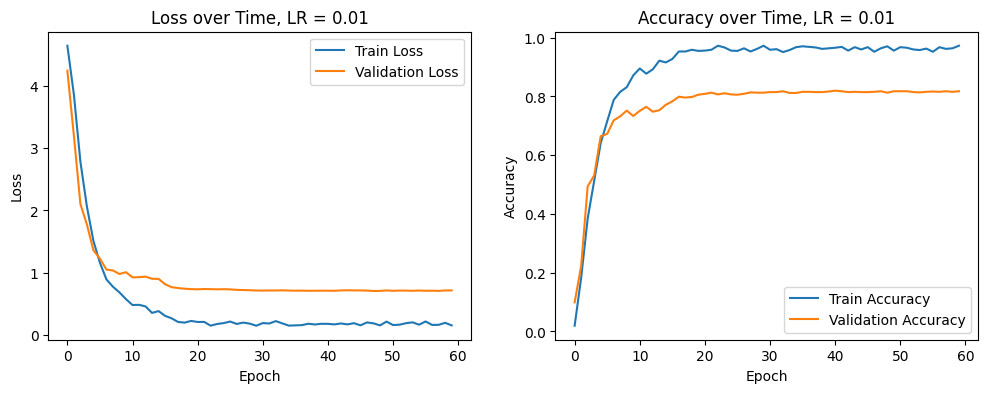

Running experiment with LR=0.1
Epoch 1/60
----------
train Loss: 5.1493 Acc: 0.0353
val Loss: 614067.8375 Acc: 0.0098
Epoch 2/60
----------
train Loss: 5.2567 Acc: 0.0216
val Loss: 270650.2847 Acc: 0.0098
Epoch 3/60
----------
train Loss: 4.5702 Acc: 0.0294
val Loss: 116.4687 Acc: 0.0118
Epoch 4/60
----------
train Loss: 4.3115 Acc: 0.0392
val Loss: 4.4706 Acc: 0.0451
Epoch 5/60
----------
train Loss: 4.1245 Acc: 0.0314
val Loss: 4.0156 Acc: 0.0539
Epoch 6/60
----------
train Loss: 3.9495 Acc: 0.0520
val Loss: 3.8998 Acc: 0.0667
Epoch 7/60
----------
train Loss: 3.8400 Acc: 0.0598
val Loss: 3.8502 Acc: 0.0804
Epoch 8/60
----------
train Loss: 3.7514 Acc: 0.0941
val Loss: 3.8259 Acc: 0.0775
Epoch 9/60
----------
train Loss: 3.6981 Acc: 0.0941
val Loss: 3.6393 Acc: 0.1137
Epoch 10/60
----------
train Loss: 3.5974 Acc: 0.1088
val Loss: 3.7281 Acc: 0.1049
Epoch 11/60
----------
train Loss: 3.6797 Acc: 0.0745
val Loss: 11.9420 Acc: 0.1127
Epoch 12/60
----------
train Loss: 3.5291 Acc: 0.116

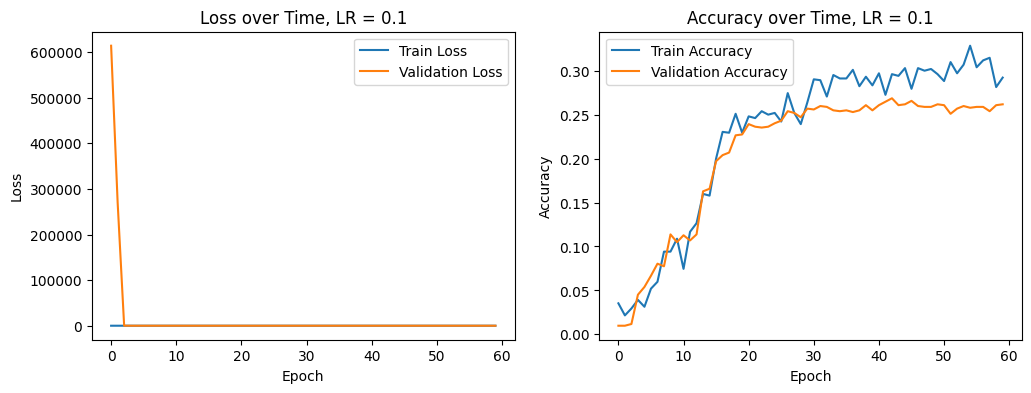

In [ ]:
def initialize_model(num_classes=102):
    model = models.resnet50(pretrained=True)
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, num_classes)  # Adjusting for 102 classes
    model = model.to(device)
    return model

def run_experiment(learning_rate, num_epochs=60):
    model = initialize_model(num_classes=len(class_names))
    criterion = nn.CrossEntropyLoss()

    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

    scheduler = lr_scheduler.MultiStepLR(optimizer, milestones=[15, 30, 45], gamma=0.1)

    model_ft = train_model(model, criterion, optimizer, scheduler, num_epochs=num_epochs)

    return model_ft


learning_rates = [0.01, 0.1]
ls_metric = {}
for lr in learning_rates:
    print(f"Running experiment with LR={lr}")
    trained_model,  train_loss_history, val_loss_history, train_acc_history, val_acc_history = run_experiment(learning_rate=lr)
    print("Train loss last epoch:", train_loss_history[-1])
    print("Validation loss last epoch:", val_loss_history[-1])
    print("Train accuracy last epoch:", train_acc_history[-1])
    print("Validation accuracy last epoch:", val_acc_history[-1])
    plot_res(train_loss_history, val_loss_history, train_acc_history, val_acc_history, lr)



Base on the plot, the learning rate of 0.01 gives the best accuracy on the target dataset, at around 80%, while lr of 0.1 is around 30% and lr of 0.001 is around 65%. The graphs and statistics indicate that a learning rate of 0.01 is optimal among the tested values for the last layer's training.

A too high learning rate (like 0.1 in this case) can cause the model to converge too quickly to a suboptimal solution. A too low learning rate (like 0.001) results in slow convergence, which might need more epochs to reach the best accuracy, or it might get stuck in local minima. 0.01 is more like a balance and give the optimal accuracy among three.

### 2.2.a


Training with LR=1


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/60
----------
train Loss: 100.2251 Acc: 0.0422
val Loss: 276.1855 Acc: 0.1088
Epoch 2/60
----------
train Loss: 388.4444 Acc: 0.1265
val Loss: 425.3760 Acc: 0.1451
Epoch 3/60
----------
train Loss: 415.5208 Acc: 0.1804
val Loss: 339.9169 Acc: 0.2294
Epoch 4/60
----------
train Loss: 280.6309 Acc: 0.1931
val Loss: 211.1573 Acc: 0.2784
Epoch 5/60
----------
train Loss: 166.0334 Acc: 0.2882
val Loss: 100.0395 Acc: 0.3598
Epoch 6/60
----------
train Loss: 79.6639 Acc: 0.3500
val Loss: 64.1179 Acc: 0.3882
Epoch 7/60
----------
train Loss: 45.9605 Acc: 0.4363
val Loss: 36.0731 Acc: 0.4696
Epoch 8/60
----------
train Loss: 34.9874 Acc: 0.4608
val Loss: 39.5485 Acc: 0.4441
Epoch 9/60
----------
train Loss: 33.4615 Acc: 0.4931
val Loss: 36.2807 Acc: 0.4833
Epoch 10/60
----------
train Loss: 29.0923 Acc: 0.5147
val Loss: 29.3178 Acc: 0.5137
Epoch 11/60
----------
train Loss: 27.0007 Acc: 0.5255
val Loss: 32.1242 Acc: 0.4882
Epoch 12/60
----------
train Loss: 27.7347 Acc: 0.5422
val Loss:

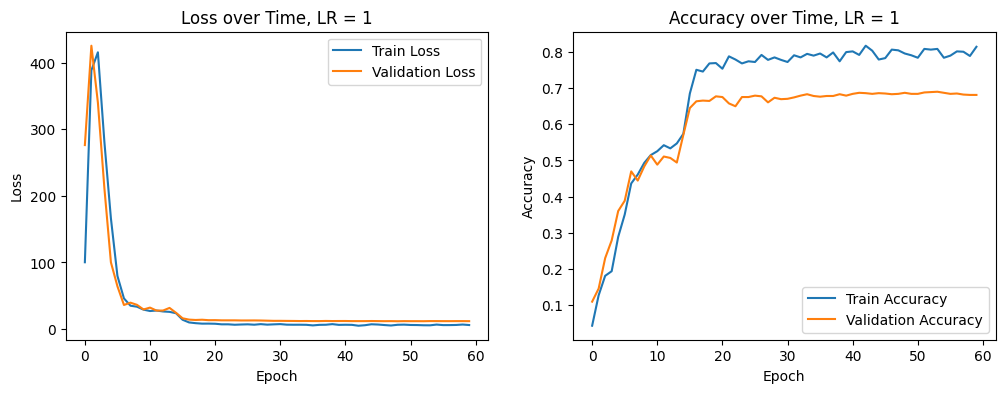

Training with LR=0.1
Epoch 1/60
----------
train Loss: 5.2516 Acc: 0.0402
val Loss: 4.6345 Acc: 0.1941
Epoch 2/60
----------
train Loss: 4.4797 Acc: 0.2529
val Loss: 3.5826 Acc: 0.3598
Epoch 3/60
----------
train Loss: 3.6684 Acc: 0.3598
val Loss: 3.1027 Acc: 0.4176
Epoch 4/60
----------
train Loss: 2.8782 Acc: 0.4529
val Loss: 2.7522 Acc: 0.4794
Epoch 5/60
----------
train Loss: 2.7213 Acc: 0.4833
val Loss: 2.3451 Acc: 0.4824
Epoch 6/60
----------
train Loss: 2.2180 Acc: 0.5480
val Loss: 2.7887 Acc: 0.4863
Epoch 7/60
----------
train Loss: 2.5660 Acc: 0.5294
val Loss: 2.4903 Acc: 0.5235
Epoch 8/60
----------
train Loss: 2.1791 Acc: 0.5431
val Loss: 2.4465 Acc: 0.5422
Epoch 9/60
----------
train Loss: 2.0316 Acc: 0.6108
val Loss: 2.5288 Acc: 0.5549
Epoch 10/60
----------
train Loss: 2.2062 Acc: 0.5716
val Loss: 2.6321 Acc: 0.5451
Epoch 11/60
----------
train Loss: 2.2387 Acc: 0.5667
val Loss: 2.7581 Acc: 0.5324
Epoch 12/60
----------
train Loss: 2.2202 Acc: 0.5892
val Loss: 2.6155 Acc:

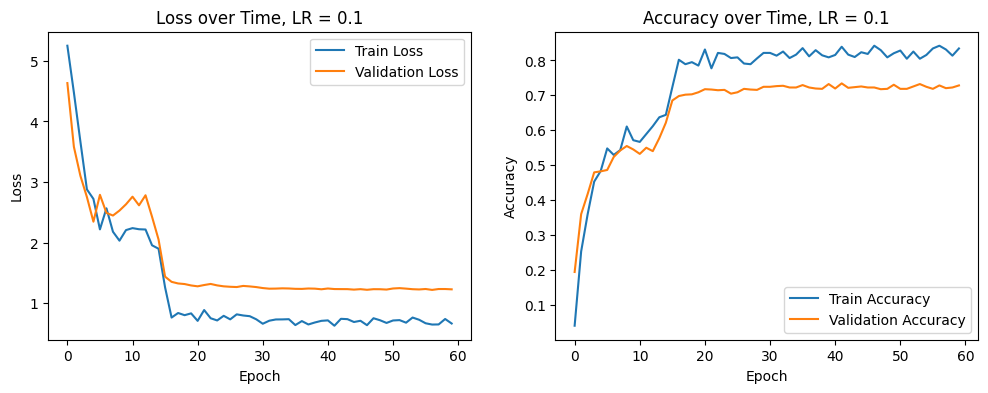

Training with LR=0.01
Epoch 1/60
----------
train Loss: 4.6852 Acc: 0.0167
val Loss: 4.3824 Acc: 0.0686
Epoch 2/60
----------
train Loss: 4.3321 Acc: 0.1010
val Loss: 3.9212 Acc: 0.2686
Epoch 3/60
----------
train Loss: 3.9065 Acc: 0.2255
val Loss: 3.5029 Acc: 0.3529
Epoch 4/60
----------
train Loss: 3.5460 Acc: 0.3157
val Loss: 3.1425 Acc: 0.4353
Epoch 5/60
----------
train Loss: 3.2435 Acc: 0.3931
val Loss: 2.8863 Acc: 0.4892
Epoch 6/60
----------
train Loss: 3.0202 Acc: 0.4382
val Loss: 2.6512 Acc: 0.5176
Epoch 7/60
----------
train Loss: 2.7443 Acc: 0.4716
val Loss: 2.4441 Acc: 0.5794
Epoch 8/60
----------
train Loss: 2.5402 Acc: 0.5471
val Loss: 2.2895 Acc: 0.5951
Epoch 9/60
----------
train Loss: 2.3999 Acc: 0.5765
val Loss: 2.1668 Acc: 0.6039
Epoch 10/60
----------
train Loss: 2.2480 Acc: 0.5755
val Loss: 2.0497 Acc: 0.6186
Epoch 11/60
----------
train Loss: 2.1219 Acc: 0.5873
val Loss: 1.9680 Acc: 0.6304
Epoch 12/60
----------
train Loss: 2.0547 Acc: 0.6265
val Loss: 1.8733 Acc

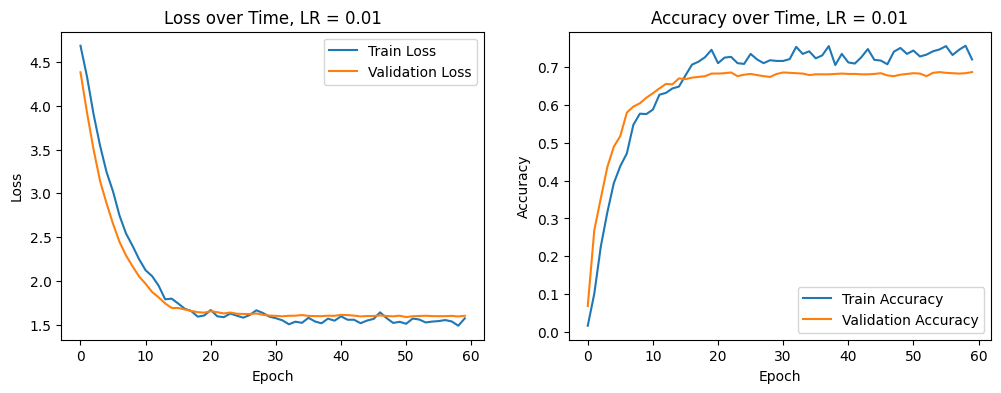

Training with LR=0.001
Epoch 1/60
----------
train Loss: 4.6717 Acc: 0.0059
val Loss: 4.6325 Acc: 0.0078
Epoch 2/60
----------
train Loss: 4.6204 Acc: 0.0186
val Loss: 4.5619 Acc: 0.0176
Epoch 3/60
----------
train Loss: 4.5522 Acc: 0.0275
val Loss: 4.5048 Acc: 0.0373
Epoch 4/60
----------
train Loss: 4.5030 Acc: 0.0441
val Loss: 4.4506 Acc: 0.0843
Epoch 5/60
----------
train Loss: 4.4606 Acc: 0.0814
val Loss: 4.3953 Acc: 0.1216
Epoch 6/60
----------
train Loss: 4.3999 Acc: 0.1284
val Loss: 4.3427 Acc: 0.1549
Epoch 7/60
----------
train Loss: 4.3496 Acc: 0.1667
val Loss: 4.2886 Acc: 0.2137
Epoch 8/60
----------
train Loss: 4.3017 Acc: 0.1853
val Loss: 4.2372 Acc: 0.2480
Epoch 9/60
----------
train Loss: 4.2522 Acc: 0.2441
val Loss: 4.1895 Acc: 0.2902
Epoch 10/60
----------
train Loss: 4.2059 Acc: 0.2725
val Loss: 4.1385 Acc: 0.3225
Epoch 11/60
----------
train Loss: 4.1580 Acc: 0.3069
val Loss: 4.0913 Acc: 0.3363
Epoch 12/60
----------
train Loss: 4.1193 Acc: 0.3137
val Loss: 4.0418 Ac

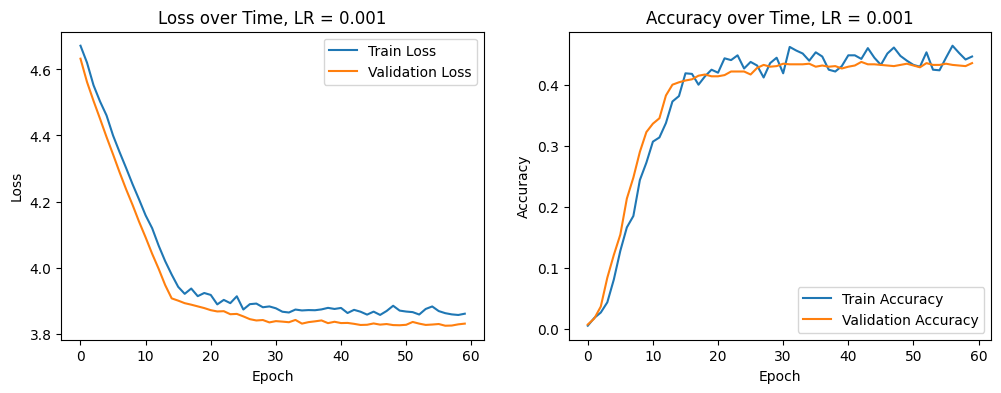

LR: 1, Best Validation Accuracy: 0.6901960784313725
LR: 0.1, Best Validation Accuracy: 0.734313725490196
LR: 0.01, Best Validation Accuracy: 0.6862745098039216
LR: 0.001, Best Validation Accuracy: 0.4372549019607843


In [ ]:

def prepare_feature_extractor(model):
    for param in model.parameters():
        param.requires_grad = False  # Freeze all layers
    # Unfreeze the last layer
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, 102)
    model.fc.weight.requires_grad = True
    model.fc.bias.requires_grad = True
    return model

learning_rates = [1, 0.1, 0.01, 0.001]
results = {}

for lr in learning_rates:
    print(f"Training with LR={lr}")
    model = models.resnet50(pretrained=True)
    model = prepare_feature_extractor(model)
    model.to(device)

    optimizer = optim.SGD(filter(lambda p: p.requires_grad, model.parameters()), lr=lr, momentum=0.9)
    criterion = nn.CrossEntropyLoss()
    scheduler = lr_scheduler.MultiStepLR(optimizer, milestones=[15, 30, 45], gamma=0.1)
    start_time = time.time()
    model_ft, train_loss_history, val_loss_history, train_acc_history, val_acc_history = train_model(model, criterion, optimizer, scheduler, num_epochs=60)
    end_time = time.time()
    print(f"Training complete in {(end_time - start_time) // 60:.0f}m {(end_time - start_time) % 60:.0f}s")
    results[lr] = [train_loss_history, val_loss_history, train_acc_history, val_acc_history]
    plot_res(train_loss_history, val_loss_history, train_acc_history, val_acc_history, lr)

for lr, item in results.items():
    print(f"LR: {lr}, Best Validation Accuracy: {max(item[3])}")



For the best accuracy:

lr of 1 Best val Acc: 0.690196

lr of 0.1 Best val Acc: 0.734314

lr of 0.01 Best val Acc: 0.686275

lr of 0.001 Best val Acc: 0.437255

Therefore, learning rate of 0.1 gives the best accuracy







### 2.2.b

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=60):
    train_loss_history = []
    val_loss_history = []
    train_acc_history = []
    val_acc_history = []
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):


        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # Backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)
            epoch_acc = epoch_acc.cpu().item()

            if phase == 'train':
                train_loss_history.append(epoch_loss)
                train_acc_history.append(epoch_acc)
            else:
                val_loss_history.append(epoch_loss)
                val_acc_history.append(epoch_acc)



            # Deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())



    # Load best model weights
    model.load_state_dict(best_model_wts)
    return model, train_loss_history, val_loss_history, train_acc_history, val_acc_history

def plot_res (train_loss_history, val_loss_history, train_acc_history, val_acc_history, lr):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss_history, label='Train Loss')
    plt.plot(val_loss_history, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Loss over Time, LR = {lr}')
    plt.legend()


    plt.subplot(1, 2, 2)
    plt.plot(train_acc_history, label='Train Accuracy')
    plt.plot(val_acc_history, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy over Time, LR = {lr}')
    plt.legend()

    plt.show()

    return

Training with LR=1
Training complete in 7m 52s


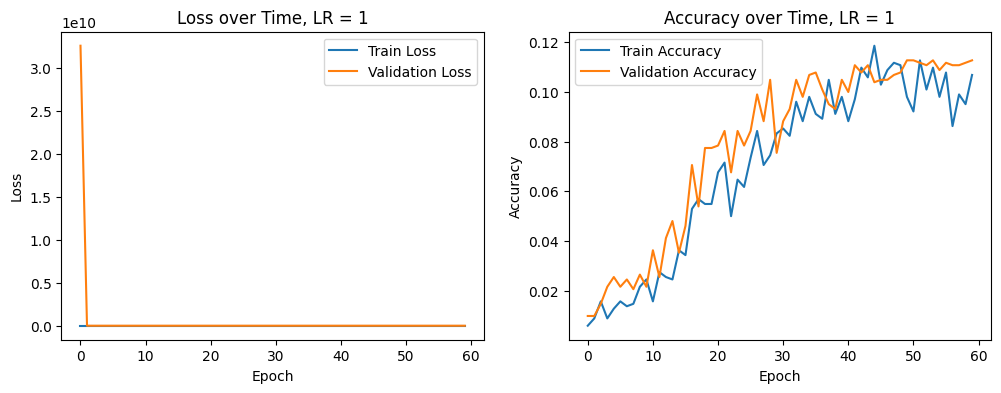

Training with LR=0.1
Training complete in 7m 50s


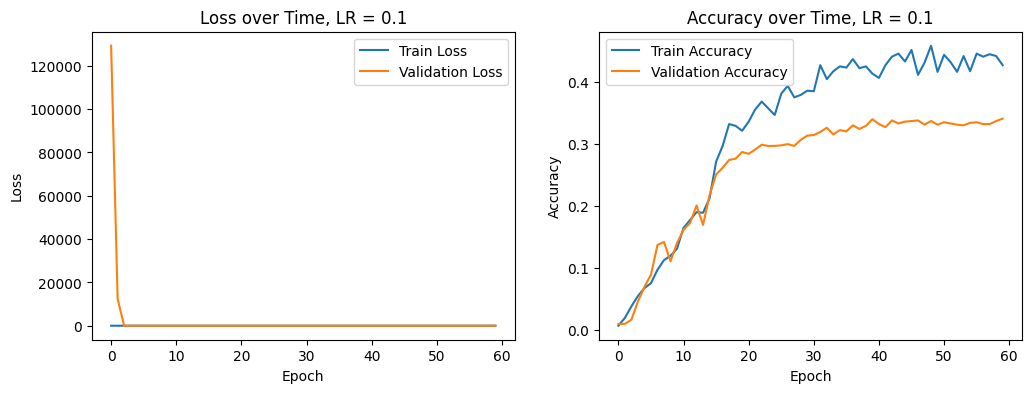

Training with LR=0.01
Training complete in 7m 50s


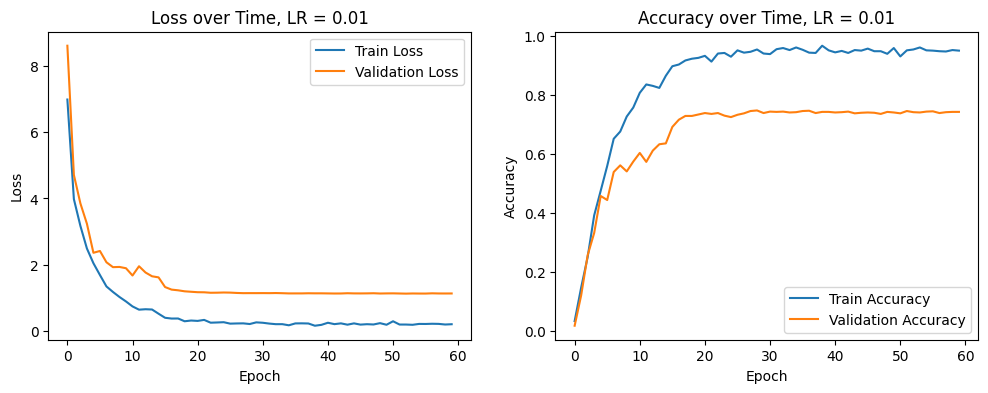

Training with LR=0.001
Training complete in 7m 50s


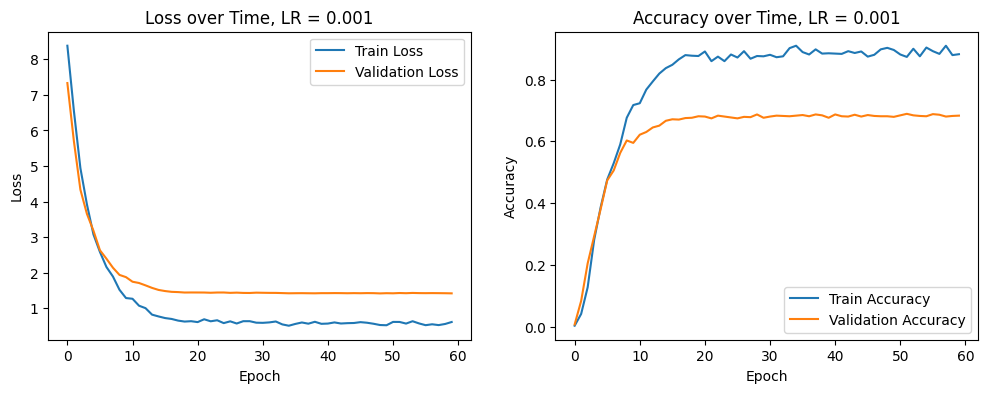

LR: 1, Best Validation Accuracy: 0.11274509803921569
LR: 0.1, Best Validation Accuracy: 0.3411764705882353
LR: 0.01, Best Validation Accuracy: 0.7470588235294118
LR: 0.001, Best Validation Accuracy: 0.6892156862745098


In [ ]:

learning_rates = [1, 0.1, 0.01, 0.001]
results = {}

# multistep learning rate schedules
scheduler = lr_scheduler.MultiStepLR(optimizer, milestones=[15, 30, 45], gamma=0.1)
for lr in learning_rates:
    print(f"Training with LR={lr}")
    model = models.resnet50(pretrained=True)
    model.to(device)

    optimizer = optim.SGD(filter(lambda p: p.requires_grad, model.parameters()), lr=lr, momentum=0.9)
    criterion = nn.CrossEntropyLoss()
    scheduler = lr_scheduler.MultiStepLR(optimizer, milestones=[15, 30, 45], gamma=0.1)
    start_time = time.time()
    model_ft, train_loss_history, val_loss_history, train_acc_history, val_acc_history = train_model(model, criterion, optimizer, scheduler, num_epochs=60);
    end_time = time.time()
    print(f"Training complete in {(end_time - start_time) // 60:.0f}m {(end_time - start_time) % 60:.0f}s")
    results[lr] = [train_loss_history, val_loss_history, train_acc_history, val_acc_history]
    plot_res(train_loss_history, val_loss_history, train_acc_history, val_acc_history, lr)

for lr, item in results.items():
    print(f"LR: {lr}, Best Validation Accuracy: {max(item[3])}")



Now we have all the graphs and statistic:

**Fine tuning:**

LR: 1, Best Validation Accuracy: 0.1127

LR: 0.1, Best Validation Accuracy: 0.3411

LR: 0.01, Best Validation Accuracy: 0.7470 (winner)

LR: 0.001, Best Validation Accuracy: 0.6892

**feature extractor:**

LR: 1, Best Validation Accuracy: 0.6901

LR: 0.1, Best Validation Accuracy: 0.7343 (close to winner)

LR: 0.01, Best Validation Accuracy: 0.6862

LR: 0.001, Best Validation Accuracy: 0.4372

Along with the 8 graphs shown above in 2.2.b and 2.1.c, we can say the finetuning the base model with a learning rate at 0.01 is the best strategy. The second best (closer to the winner) is using base model as feature extractor at the learning rate of 0.1.

Here is why finetuning the base model with a learning rate at 0.01 is the best strategy:

Fine-tuning allows the pretrained weights to adapt to the specific characteristics and features of the target dataset. By updating all layers with a small learning rate, the model can make incremental adjustments to learn domain-specific representations while still leveraging the general features learned from the source dataset.

A learning rate of 0.01 strikes a good balance between allowing the model to adapt to the new dataset and preventing the weights from changing too drastically and losing the useful knowledge gained from pretraining. Higher learning rates like 0.1 and 1 likely cause the model to forget the pretrained weights too quickly.

On the other hand, using the base model as a fixed feature extractor doesn't allow the lower layers to adapt at all to the target dataset. While the last layer can still learn to map the generic features to the target classes, the overall performance is constrained by the lack of feature specialization in the lower layers.

A learning rate of 0.001 may be too small, making it difficult for the model to sufficiently adapt the pretrained weights to the target dataset in the given number of epochs. This explains the lower performance of both fine-tuning and feature extractor at this learning rate.


## Problem 3 - Weakly and Semi-Supervised Learning for Image Classification

### 3.1.

The main difference between weakly supervised and semi-supervised pretraining is how they leverage the massive dataset of 1 billion images with hashtags.

In the weakly supervised approach in Mahajan, they treat the hashtags associated with each image as "weak" or noisy labels. Basically, the hashtags give some indication of what's in the image, but they're not perfect labels like you'd have in a carefully curated dataset. The model learns from these noisy hashtag labels during pretraining.

On the other hand, the semi-supervised method used by Yalinz. considers the hashtags as additional information, but not explicit labels. Their approach uses the hashtags to guide the selection of image batches for training, but doesn't directly train model to predict the hashtags. Instead, they use a teacher-student model where the teacher helps generate pseudo-labels for the unlabeled images, and then the student's model learns from a mix of the original labeled data and the new pseudo-labeled data.

So basically, weakly supervised learning treats the hashtags as labels, albeit noisy ones, while semi-supervised learning uses the hashtags to inform the training process but doesn't rely on them as ground truth labels.

### 3.2.a

Yes it is robust against noise.

The authors conducted experiments where they took their IG-1B-17k dataset (1 billion images, 17,000 hashtags) and randomly replaced some percentage of the hashtags with other hashtags, essentially injecting additional label noise. They tried noise levels of 10%, 25%, and 50%.

After pretraining ResNeXt-101 32x16d models on these noisy datasets, they evaluated them on ImageNet classification tasks with 1k, 5k, and 9k classes. Interestingly, the results showed that the models were surprisingly robust to the injected label noise!

With 10% label noise, the accuracy dropped by less than 1 percentage point compared to training with the original hashtags. Even with a whopping 25% of the hashtags randomized, accuracy only decreased by around 2%.

It took a very high level of 50% label noise to see a more significant drop in transfer performance - about 6% lower accuracy with 50% noise compared to the no-noise baseline.

So in short, the Mahajan et al. results suggest that pretraining on hashtags is quite robust, even if a substantial fraction of the hashtag labels are complete noise. The models seem to be able to learn useful visual representations despite the presence of misleading labels.





### 3.2.b

So in the Mahajan et al. paper, they note that the frequency of hashtags follows a Zipfian distribution - basically, some hashtags are used way more often than others. For example, in their 17k hashtag dataset, the most frequent tag appears over a million times more than the least frequent one. They hypothesize that training on this natural, highly imbalanced distribution might not be optimal for learning transferable features. The model could get biased towards the most common hashtags and not learn as much from the rare ones.

they experimented with different resampling strategies during pretraining:

Square root sampling: sample an image with probability proportional to the square root of its hashtag frequency

Uniform sampling: sample hashtags uniformly at random

they found that both of these resampling approaches improved transfer learning performance, as shown in Figure 4 in the paper. The improvements held across different target dataset sizes.

So, resampling the hashtag distribution is important because it counteracts the strong bias towards a small number of common hashtags. By equalizing the hashtag distribution in pretraining, the model is encouraged to learn more transferable features that aren't as skewed by the most frequent categories. The results show this leads to better downstream performance after finetuning.

### 3.3.a

The teacher model is used to generate pseudo-labels for the unlabeled images. Specifically, the teacher model, which is trained on the original labeled dataset, is used to predict labels for the unlabeled images. The top-K images for each class based on the teacher's predictions are then used to create a new dataset D_hat with "pseudo-labels".

The student model is then trained on this new pseudo-labeled dataset D_hat. By learning from the teacher's predictions on unlabeled data, the student model is able to leverage the information the teacher has extracted from the original labeled dataset.

This teacher-student approach is a form of knowledge distillation is because the student model is learning the output of the teacher model on the unlabeled data, rather than learning directly from ground-truth labels. The idea in knowledge distillation is to train a smaller model to mimic the behavior of a larger model.

By using the teacher's predictions as pseudo-labels for the unlabeled data and training the student on this pseudo-labeled data, the student is in effect trying to mimic the teacher's behavior on the unlabeled dataset. So it knows some of the knowledge but not all, without access to the original labels for unlabeled images.



### 3.3.b

In stage 2 of the approach, the teacher network is used to assign classes to the unlabeled images. There are two important parameters here: K and P.

K determines how many images are selected for each class. After the teacher network predicts classes for all the unlabeled images, the top K images for each predicted class are chosen to create the new dataset D_hat. So K essentially controls the number of pseudo-labeled examples per class.

P is the number of classes an image can be assigned to. When P = 1, each image is assigned only to the class with the highest prediction score. But when P > 1, an image can be assigned to multiple classes (specifically, the top P classes based on the prediction scores).

The idea behind allowing P > 1 is that an image might contain multiple objects or concepts, especially in the case of large, complex images. By allowing an image to be assigned to multiple classes, the approach can capture this diversity and potentially create a richer, more informative pseudo-labeled dataset.

For example, if an image contains both a dog and a cat, with P = 1 it would only be assigned to either the 'dog' or 'cat' class, depending on which had the higher prediction score. But with P > 1, it could be assigned to both classes, saving the information that the image contains both a dog and a cat.

So basicaly, K controls the quantity of pseudo-labels per class, while P controls the diversity of pseudo-labels per image.

### 3.3.c

In the approach in Yalniz et al., the first step is to train a teacher model on the original labeled dataset. Then, this teacher model is used to predict labels for the unlabeled images.

For each unlabeled image, the teacher model has a probability distribution. The class with the highest probability is considered the most likely label for that image. However, instead of just taking the top-1 class, the approach considers the top-P classes.

This means that for each image, we have P potential labels (where P is a hyperparameter). If P > 1, then a single image can indeed be assigned to multiple classes.

Next, for each class, the K images with the highest probabilities for that class are selected (where K is another hyperparameter). These images, along with their predicted labels, form the new dataset D_hat.

So, to summarize:

The teacher model predicts P labels for each unlabeled image.
For each class, the K images with the highest probabilities are selected.
These images and their predicted labels form the new dataset D_hat.


**The answer is yes, can belong to more than one class, if P > 1.**

When P > 1, each unlabeled image can be assigned to multiple (specifically, P) classes. If an image is in the top K for more than one of these classes, it will appear in the new dataset D_hat multiple times, once with each of these labels.

For example, suppose P = 3, and for a particular unlabeled image, the teacher model assigns the following probabilities: cat: 0.5, dog: 0.3, car: 0.2. If K = 100 and this image is in the top 100 for both the 'cat' and 'dog' classes, then it will appear in D_hat twice: once labeled as 'cat' and once labeled as 'dog'.

So, by setting P > 1, the approach allows for a single image to be associated with multiple classes in the new pseudo-labeled dataset.


### 3.3.d

The graph has three lines, each corresponding to a different number of pre-training iterations (1 billion, 500 million, and 250 million). All lines show a similar trend: as K increases from a small value, the accuracy initially improves, reaches a peak, and then starts to decline.

Here's why this happen:

When K is small, the pseudo-labeled dataset is also small, and therefore the student model may not have enough data to learn effectively. Increasing K in this regime provides the model with more training data, which helps improve its accuracy.

However, as K becomes larger, the quality of the pseudo-labels starts to degrade. Remember, the teacher model is not perfect, and it will make mistakes when predicting labels for the unlabeled images. As we increase K, we start to include images for which the teacher model is less confident, and therefore more likely to be mislabeled.

When K is too large, the pseudo-labeled dataset will contain a significant number of mislabeled images. Training the student model on this noisy data can actually hurt its performance, causing the accuracy to drop.

The optimal of K is a balance between these two effects. It provides the student model with enough data to learn effectively, but not so much that the noise in the pseudo-labels starts to dominate. In Figure 5, this optimal value appears to be around 16,000 for all three pre-training durations.

Interestingly, the graph also shows that with more pre-training iterations, the student model can achieve higher accuracy and is more robust to the choice of K. This suggests that longer pre-training allows the student model to extract more useful information even from noisy pseudo-labels.

## Problem 4 - Siamese Network for Face Recognition

### 4.1


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
from PIL import Image
import PIL.ImageOps

import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import torchvision.utils
import torch
from torch.autograd import Variable
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

# Creating some helper functions
def imshow(img, text=None):
    npimg = img.numpy()
    plt.axis("off")
    if text:
        plt.text(75, 8, text, style='italic',fontweight='bold',
            bbox={'facecolor':'white', 'alpha':0.8, 'pad':10})

    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

def show_plot(iteration,loss):
    plt.plot(iteration,loss)
    plt.show()

class SiameseNetworkDataset(Dataset):
    def __init__(self,imageFolderDataset,transform=None):
        self.imageFolderDataset = imageFolderDataset
        self.transform = transform

    def __getitem__(self,index):
        img0_tuple = random.choice(self.imageFolderDataset.imgs)

        #We need to approximately 50% of images to be in the same class
        should_get_same_class = random.randint(0,1)
        if should_get_same_class:
            while True:
                #Look untill the same class image is found
                img1_tuple = random.choice(self.imageFolderDataset.imgs)
                if img0_tuple[1] == img1_tuple[1]:
                    break
        else:

            while True:
                #Look untill a different class image is found
                img1_tuple = random.choice(self.imageFolderDataset.imgs)
                if img0_tuple[1] != img1_tuple[1]:
                    break

        img0 = Image.open(img0_tuple[0])
        img1 = Image.open(img1_tuple[0])

        img0 = img0.convert("L")
        img1 = img1.convert("L")

        if self.transform is not None:
            img0 = self.transform(img0)
            img1 = self.transform(img1)

        return img0, img1, torch.from_numpy(np.array([int(img1_tuple[1] != img0_tuple[1])], dtype=np.float32))

    def __len__(self):
        return len(self.imageFolderDataset.imgs)

In [ ]:
!wget https://github.com/maticvl/dataHacker/raw/master/DATA/at%26t.zip
!rm -rf data
!unzip "at&t.zip" -d .

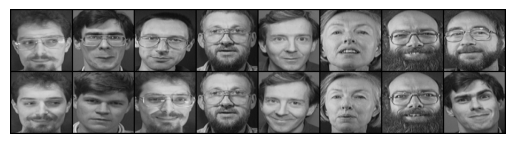

[0. 1. 1. 0. 0. 0. 0. 1.]


In [3]:
# Load the training dataset
folder_dataset = datasets.ImageFolder(root="./data/faces/training/")

# Resize the images and transform to tensors
transformation = transforms.Compose([transforms.Resize((100,100)),
                                     transforms.ToTensor()
                                    ])

# Initialize the network
siamese_dataset = SiameseNetworkDataset(imageFolderDataset=folder_dataset,
                                        transform=transformation)


# Create a simple dataloader just for simple visualization
vis_dataloader = DataLoader(siamese_dataset,
                        shuffle=True,
                        num_workers=2,
                        batch_size=8)

# Extract one batch
example_batch = next(iter(vis_dataloader))

# Example batch is a list containing 2x8 images, indexes 0 and 1, an also the label
# If the label is 1, it means that it is not the same person, label is 0, same person in both images
concatenated = torch.cat((example_batch[0], example_batch[1]),0)

imshow(torchvision.utils.make_grid(concatenated))
print(example_batch[2].numpy().reshape(-1))

In [20]:
#create the Siamese Neural Network
class SiameseNetwork(nn.Module):

    def __init__(self):
        super(SiameseNetwork, self).__init__()

        # Setting up the Sequential of CNN Layers
        self.cnn1 = nn.Sequential(
            nn.Conv2d(1, 96, kernel_size=11,stride=4),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(3, stride=2),

            nn.Conv2d(96, 256, kernel_size=5, stride=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, stride=2),

            nn.Conv2d(256, 384, kernel_size=3,stride=1),
            nn.ReLU(inplace=True)
        )

        # Setting up the Fully Connected Layers
        self.fc1 = nn.Sequential(
            nn.Linear(384, 1024),
            nn.ReLU(inplace=True),

            nn.Linear(1024, 256),
            nn.ReLU(inplace=True),

            nn.Linear(256,2)
        )

    def forward_once(self, x):
        # This function will be called for both images
        # It's output is used to determine the similiarity
        output = self.cnn1(x)
        output = output.view(output.size()[0], -1)
        output = self.fc1(output)
        return output

    def forward(self, input1, input2):
        # In this function we pass in both images and obtain both vectors
        # which are returned
        output1 = self.forward_once(input1)
        output2 = self.forward_once(input2)

        return output1, output2

# Define the Contrastive Loss Function
class ContrastiveLoss(torch.nn.Module):
    def __init__(self, margin=2.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
      # Calculate the euclidian distance and calculate the contrastive loss
      euclidean_distance = F.pairwise_distance(output1, output2, keepdim = True)

      loss_contrastive = torch.mean((1-label) * torch.pow(euclidean_distance, 2) +
                                    (label) * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2))


      return loss_contrastive

# Load the training dataset
train_dataloader = DataLoader(siamese_dataset,
                        shuffle=True,
                        num_workers=16,
                        batch_size=64)


net = SiameseNetwork().cuda()
criterion = ContrastiveLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.0005 )


Epoch number 0
 Current loss 2.2465341091156006

Epoch number 1
 Current loss 1.0546875

Epoch number 2
 Current loss 0.5841240286827087

Epoch number 3
 Current loss 0.8001304268836975

Epoch number 4
 Current loss 0.7413891553878784

Epoch number 5
 Current loss 0.8572967052459717

Epoch number 6
 Current loss 0.7639464735984802

Epoch number 7
 Current loss 0.6890126466751099

Epoch number 8
 Current loss 0.6720777750015259

Epoch number 9
 Current loss 0.5953816175460815

Epoch number 10
 Current loss 0.4190443754196167

Epoch number 11
 Current loss 0.495402455329895

Epoch number 12
 Current loss 0.4645419716835022

Epoch number 13
 Current loss 0.3467298150062561

Epoch number 14
 Current loss 0.4066329896450043

Epoch number 15
 Current loss 0.5130650997161865

Epoch number 16
 Current loss 0.3740750253200531

Epoch number 17
 Current loss 0.3433085083961487

Epoch number 18
 Current loss 0.4147787094116211

Epoch number 19
 Current loss 0.4597385823726654

Epoch number 20
 Cur

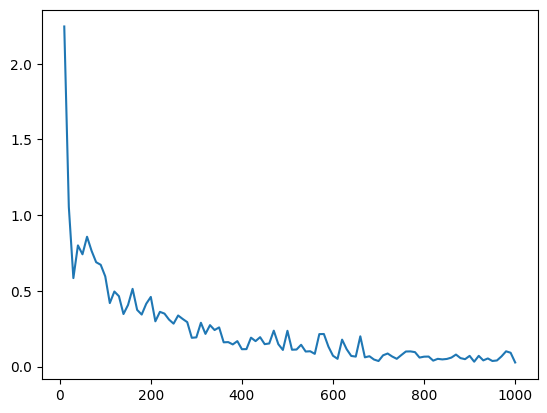

In [5]:
counter = []
loss_history = []
iteration_number= 0

# Iterate throught the epochs
for epoch in range(100):

    # Iterate over batches
    for i, (img0, img1, label) in enumerate(train_dataloader, 0):

        # Send the images and labels to CUDA
        img0, img1, label = img0.cuda(), img1.cuda(), label.cuda()

        # Zero the gradients
        optimizer.zero_grad()

        # Pass in the two images into the network and obtain two outputs
        output1, output2 = net(img0, img1)

        # Pass the outputs of the networks and label into the loss function
        loss_contrastive = criterion(output1, output2, label)

        # Calculate the backpropagation
        loss_contrastive.backward()

        # Optimize
        optimizer.step()

        # Every 10 batches print out the loss
        if i % 10 == 0 :
            print(f"Epoch number {epoch}\n Current loss {loss_contrastive.item()}\n")
            iteration_number += 10

            counter.append(iteration_number)
            loss_history.append(loss_contrastive.item())

show_plot(counter, loss_history)

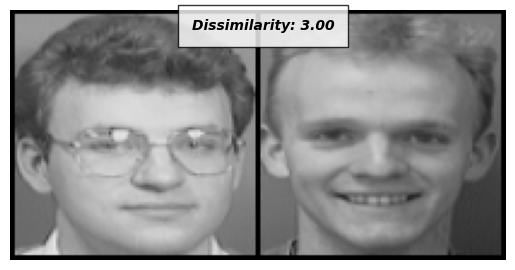

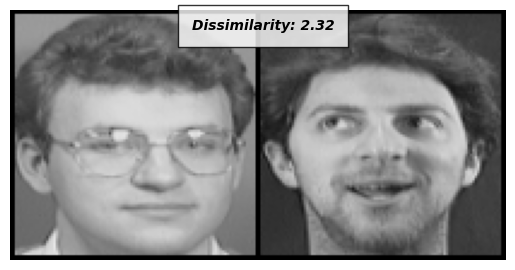

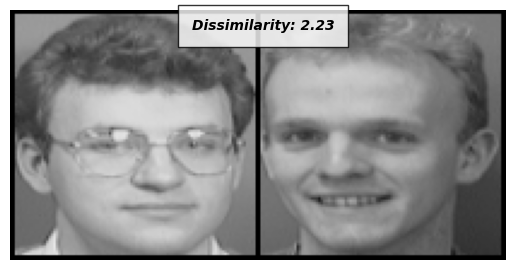

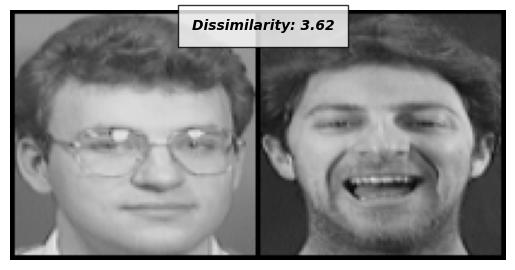

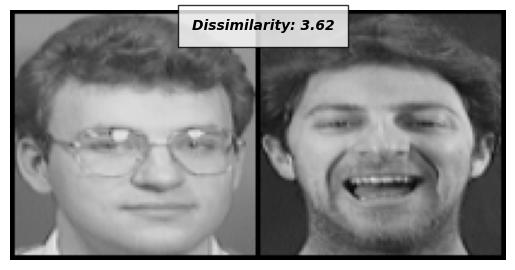

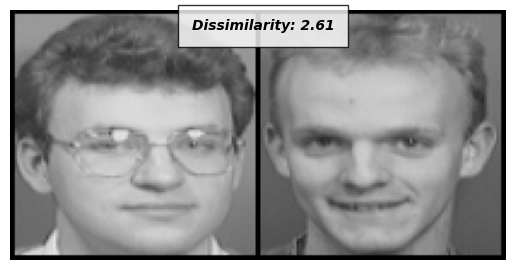

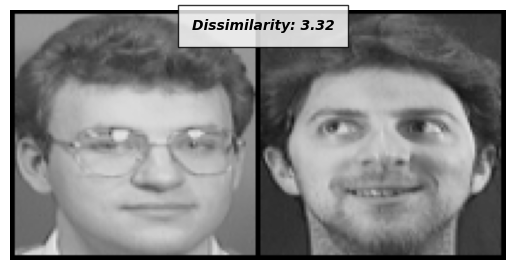

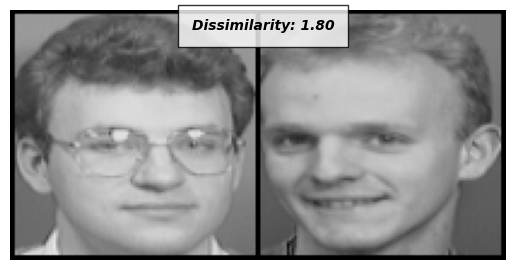

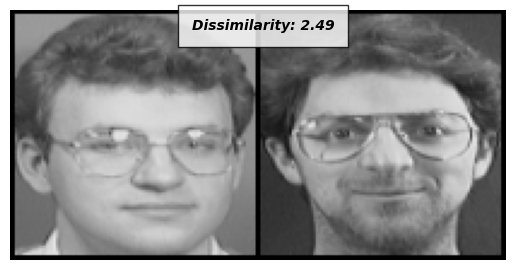

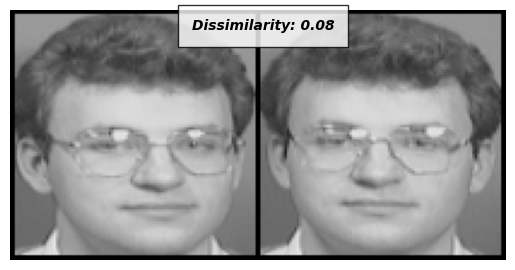

In [7]:
# Locate the test dataset and load it into the SiameseNetworkDataset
folder_dataset_test = datasets.ImageFolder(root="./data/faces/testing/")
siamese_dataset = SiameseNetworkDataset(imageFolderDataset=folder_dataset_test,
                                        transform=transformation)
test_dataloader = DataLoader(siamese_dataset, num_workers=2, batch_size=1, shuffle=True)

# Grab one image that we are going to test
dataiter = iter(test_dataloader)
x0, _, _ = next(dataiter)

for i in range(10):
    # Iterate over 10 images and test them with the first image (x0)
    _, x1, label2 = next(dataiter)

    # Concatenate the two images together
    concatenated = torch.cat((x0, x1), 0)

    output1, output2 = net(x0.cuda(), x1.cuda())
    euclidean_distance = F.pairwise_distance(output1, output2)
    imshow(torchvision.utils.make_grid(concatenated), f'Dissimilarity: {euclidean_distance.item():.2f}')

The code looks good and executed as expected with the notebook. The disimilarityy code works as expected and aligned with my own observation following a face similarity and disimilarity trend. Loss converge around 0.04, which is a reasonable number.

### 4.2.



In [12]:
def evaluate_accuracy(dataloader, net, threshold):
    correct = 0
    total = 0

    for img0, img1, label in dataloader:
        img0, img1, label = img0.cuda(), img1.cuda(), label.cuda()
        output1, output2 = net(img0, img1)
        euclidean_distance = F.pairwise_distance(output1, output2)
        prediction = (euclidean_distance > threshold).int()
        correct += (prediction == label).sum().item()
        total += label.size(0)

    accuracy = correct / total
    return accuracy

best_threshold = None
best_accuracy = 0

for threshold in np.arange(0.1, 3.0, 0.1):
    accuracy = evaluate_accuracy(test_dataloader, net, threshold)
    print(f"Threshold: {threshold:.2f}, Accuracy: {accuracy:.4f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = threshold

print(f"Best threshold: {best_threshold:.2f}, Best accuracy: {best_accuracy:.4f}")

Threshold: 0.10, Accuracy: 0.6000
Threshold: 0.20, Accuracy: 0.5333
Threshold: 0.30, Accuracy: 0.5667
Threshold: 0.40, Accuracy: 0.6333
Threshold: 0.50, Accuracy: 0.6667
Threshold: 0.60, Accuracy: 0.5000
Threshold: 0.70, Accuracy: 0.5333
Threshold: 0.80, Accuracy: 0.7667
Threshold: 0.90, Accuracy: 0.6667
Threshold: 1.00, Accuracy: 0.7667
Threshold: 1.10, Accuracy: 0.7667
Threshold: 1.20, Accuracy: 0.8000
Threshold: 1.30, Accuracy: 0.9667
Threshold: 1.40, Accuracy: 0.9000
Threshold: 1.50, Accuracy: 0.8333
Threshold: 1.60, Accuracy: 0.9000
Threshold: 1.70, Accuracy: 0.8667
Threshold: 1.80, Accuracy: 0.8333
Threshold: 1.90, Accuracy: 0.9667
Threshold: 2.00, Accuracy: 0.8000
Threshold: 2.10, Accuracy: 0.9333
Threshold: 2.20, Accuracy: 0.9333
Threshold: 2.30, Accuracy: 0.8667
Threshold: 2.40, Accuracy: 0.9333
Threshold: 2.50, Accuracy: 0.8000
Threshold: 2.60, Accuracy: 0.8667
Threshold: 2.70, Accuracy: 0.8667
Threshold: 2.80, Accuracy: 0.8667
Threshold: 2.90, Accuracy: 0.8667
Best threshold

Based on the result, we say the best threshold is 1.3 in terms of euclidean_distance, where we achieve 97% accuracy. But the dataloader is randomly selecting samples so it is not guranteed that 1.9 is always the optimal threshold.

### 4.3.

In [ ]:
## Credit to Charles Wang's answer on Campuswire: https://campuswire.com/c/G3EBA5BB9/feed/76

import os
import shutil

folder_path = "MeGlass_120x120/"
meta_file = "working/meta.txt"

#  from the meta.txt file
image_labels = {}
with open(meta_file, "r") as file:
    for line in file:
        image_name, label = line.strip().split()
        image_labels[image_name] = label

#  from the 4 text files
txt_files = ["gallery_black_glass.txt", "gallery_no_glass.txt", "probe_black_glass.txt", "probe_no_glass.txt"]
image_names = set()

for txt_file in txt_files:
    with open("working/test/"+txt_file, "r") as file:
        image_names.update(line.strip() for line in file)

# Filter the image files based on the names in the text files
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f in image_names]
print(image_files)
new_folder_path = "working/MeGlass_120x120_clean"
if not os.path.exists(new_folder_path):
    os.makedirs(new_folder_path)
for image_file in image_files:
    identity = image_file.split("@")[0]
    subfolder_path = os.path.join(new_folder_path, identity)
    if not os.path.exists(subfolder_path):
        os.makedirs(subfolder_path)


    glasses_folder = os.path.join(subfolder_path, "glasses")
    no_glasses_folder = os.path.join(subfolder_path, "no_glasses")
    os.makedirs(glasses_folder, exist_ok=True)
    os.makedirs(no_glasses_folder, exist_ok=True)

    #  based on the label from meta.txt
    label = image_labels.get(image_file, "")
    if label == "1":
        shutil.move(os.path.join(folder_path, image_file), os.path.join(glasses_folder, image_file))
    elif label == "0":
        shutil.move(os.path.join(folder_path, image_file), os.path.join(no_glasses_folder, image_file))

In [ ]:
# !unzip /content/MeGlass_120x120_clean.zip

In [10]:
class MeGlassDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_pairs = []
        self.labels = []

        # Iterate over each identity folder
        for identity_folder in os.listdir(root_dir):
            if identity_folder.startswith("."):
                continue
            identity_path = os.path.join(root_dir, identity_folder)


            glasses_folder = os.path.join(identity_path, "glasses")
            no_glasses_folder = os.path.join(identity_path, "no_glasses")
            glasses_images = [os.path.join(glasses_folder, f) for f in os.listdir(glasses_folder)]
            no_glasses_images = [os.path.join(no_glasses_folder, f) for f in os.listdir(no_glasses_folder)]


            for glasses_img in glasses_images:
                for no_glasses_img in no_glasses_images:
                    self.image_pairs.append((glasses_img, no_glasses_img))
                    self.labels.append(0)  # Same person, label 0

    def __getitem__(self, index):
        img0_path, img1_path = self.image_pairs[index]
        label = self.labels[index]


        img0 = Image.open(img0_path)
        img1 = Image.open(img1_path)

        img0 = img0.convert('L')
        img1 = img1.convert('L')

        # Apply transformations, if any
        if self.transform is not None:
            img0 = self.transform(img0)
            img1 = self.transform(img1)

        return img0, img1, torch.from_numpy(np.array([label], dtype=np.float32))

    def __len__(self):
        return len(self.image_pairs)

In [13]:
import os

# Load the MeGlass dataset
meglass_dataset = MeGlassDataset(root_dir="content/MeGlass_120x120_clean/", transform=transformation)
meglass_dataloader = DataLoader(meglass_dataset, batch_size=1, shuffle=True)


# Evaluate the accuracy with a threshold
threshold = 1.3
accuracy = evaluate_accuracy(meglass_dataloader, net, threshold)
print(f"Accuracy on MeGlass dataset with threshold {threshold:.2f}: {accuracy:.4f}")

Accuracy on MeGlass dataset with threshold 1.30: 0.0586


It does not perfrom well with the same person with and without glasses. With a selected threshold of 1.3, it only give an accuracy of 5%. This is bad but reasonable, without a proper loss function and dedicated NN, it fail to identify the same person with glass as the same as that person without glasses.

### 4.4

In [53]:
class MiningContrastiveLoss(nn.Module):
    def __init__(self, margin=2.0):
        super(MiningContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
      # Calculate the euclidian distance and calculate the contrastive loss
      euclidean_distance = F.pairwise_distance(output1, output2, keepdim = True)

      loss_contrastive = torch.mean((1/2*(1-label)) * torch.pow(euclidean_distance, 2) +
                                    (1/2*label) * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2))


      return loss_contrastive


In [54]:
def train1(net, train_dataloader, optimizer, epoch):
    net.train()

    for i, (img0, img1, label) in enumerate(train_dataloader, 0):
        img0, img1, label = img0.cuda(), img1.cuda(), label.cuda()
        optimizer.zero_grad()
        output1, output2 = net(img0, img1)
        loss_contrastive = criterion1(output1, output2, label)
        loss_contrastive.backward()
        optimizer.step()

        if i % 10 == 0:
            print(f"Epoch number {epoch}, Current loss {loss_contrastive.item()}")





In [55]:
net1 = SiameseNetwork().cuda()
criterion1 = MiningContrastiveLoss()
optimizer1 = optim.Adam(net1.parameters(), lr=0.0005)

num_epochs = 100
for epoch in range(num_epochs):
    train1(net1, train_dataloader, optimizer1, epoch)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch number 0, Current loss 1.0655591487884521
Epoch number 1, Current loss 0.9946683645248413
Epoch number 2, Current loss 0.9800570607185364
Epoch number 3, Current loss 1.0858770608901978
Epoch number 4, Current loss 0.80103600025177
Epoch number 5, Current loss 0.9835585951805115
Epoch number 6, Current loss 0.5978065133094788
Epoch number 7, Current loss 0.545914351940155
Epoch number 8, Current loss 0.3170720040798187
Epoch number 9, Current loss 0.27651306986808777
Epoch number 10, Current loss 0.36710384488105774
Epoch number 11, Current loss 0.2606469988822937
Epoch number 12, Current loss 0.22021439671516418
Epoch number 13, Current loss 0.07143288850784302
Epoch number 14, Current loss 0.18555057048797607
Epoch number 15, Current loss 0.11039915680885315
Epoch number 16, Current loss 0.06674335896968842
Epoch number 17, Current loss 0.05410553514957428
Epoch number 18, Current loss 0.1498231589794159
Epoch number 19, Current loss 0.07994998246431351
Epoch number 20, Current

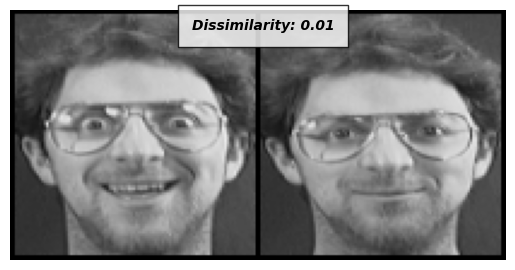

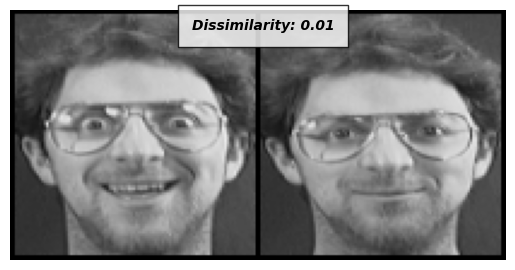

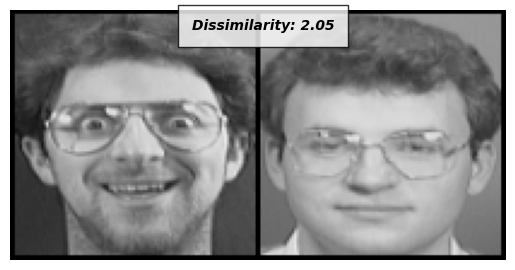

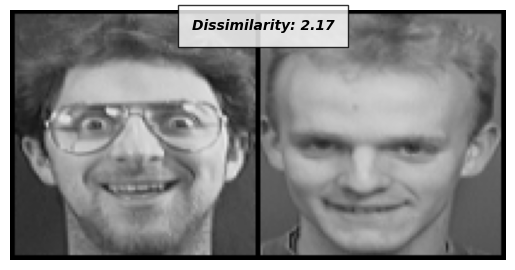

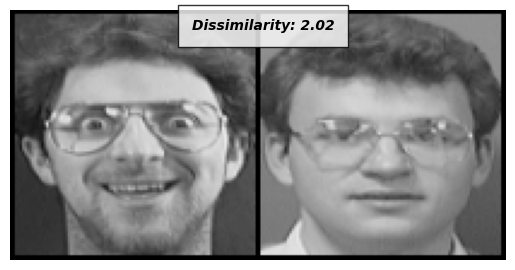

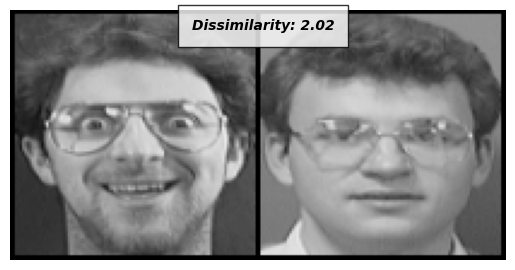

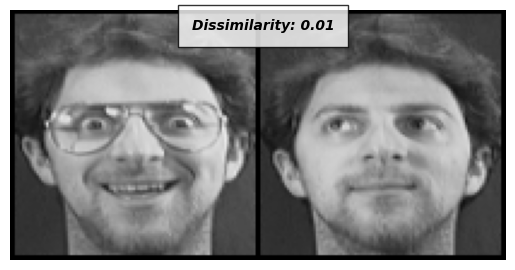

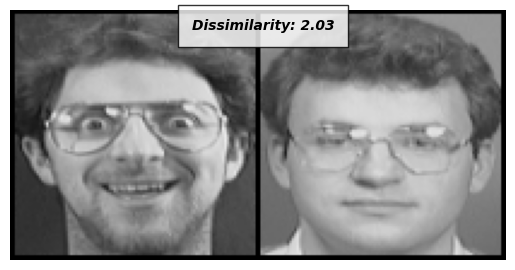

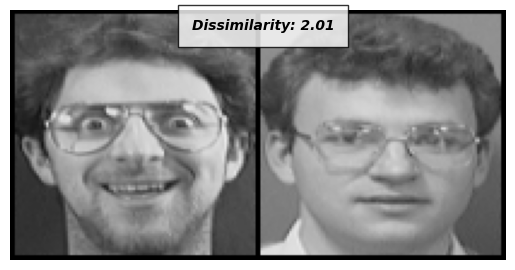

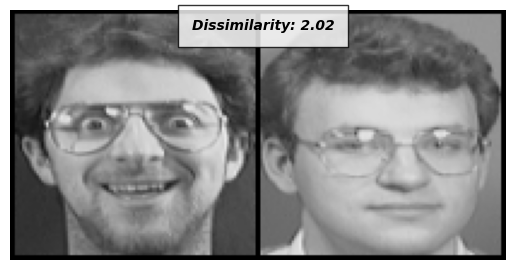

In [56]:

folder_dataset_test = datasets.ImageFolder(root="./data/faces/testing/")
siamese_dataset = SiameseNetworkDataset(imageFolderDataset=folder_dataset_test,
                                        transform=transformation)
test_dataloader = DataLoader(siamese_dataset, num_workers=2, batch_size=1, shuffle=True)


dataiter = iter(test_dataloader)
x0, _, _ = next(dataiter)

for i in range(10):
    # Iterate over 10 images and test them with the first image (x0)
    _, x1, label2 = next(dataiter)

    # Concatenate the two images together
    concatenated = torch.cat((x0, x1), 0)

    output1, output2 = net1(x0.cuda(), x1.cuda())
    euclidean_distance = F.pairwise_distance(output1, output2)
    imshow(torchvision.utils.make_grid(concatenated), f'Dissimilarity: {euclidean_distance.item():.2f}')

This looks better, as you can see, the same guy with and without glasses yield a dismiliarity score of 0.01, which aligns with our expectation.

In [57]:
def evaluate_accuracy_1(dataloader, net, threshold):
    net.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for img0, img1, label in dataloader:
            img0, img1, label = img0.cuda(), img1.cuda(), label.cuda()
            output1, output2 = net(img0, img1)
            euclidean_distance = F.pairwise_distance(output1, output2)
            prediction = (euclidean_distance < threshold).int()
            correct += (prediction == label).sum().item()
            total += label.size(0)

    accuracy = correct / total
    return accuracy

In [58]:
thresholds = np.arange(0.1, 3.0, 0.1)
best_accuracy = 0
best_threshold = None

for threshold in thresholds:
    accuracy = evaluate_accuracy(test_dataloader, net, threshold)
    print(f"Threshold: {threshold:.2f}, Accuracy: {accuracy:.4f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = threshold

print(f"Best threshold: {best_threshold:.2f}, Best accuracy: {best_accuracy:.4f}")

Threshold: 0.10, Accuracy: 0.4333
Threshold: 0.20, Accuracy: 0.5000
Threshold: 0.30, Accuracy: 0.4000
Threshold: 0.40, Accuracy: 0.5333
Threshold: 0.50, Accuracy: 0.4667
Threshold: 0.60, Accuracy: 0.6333
Threshold: 0.70, Accuracy: 0.5000
Threshold: 0.80, Accuracy: 0.6000
Threshold: 0.90, Accuracy: 0.4000
Threshold: 1.00, Accuracy: 0.6667
Threshold: 1.10, Accuracy: 0.4333
Threshold: 1.20, Accuracy: 0.8000
Threshold: 1.30, Accuracy: 0.6333
Threshold: 1.40, Accuracy: 0.5000
Threshold: 1.50, Accuracy: 0.6000
Threshold: 1.60, Accuracy: 0.6333
Threshold: 1.70, Accuracy: 0.5333
Threshold: 1.80, Accuracy: 0.4667
Threshold: 1.90, Accuracy: 0.6333
Threshold: 2.00, Accuracy: 0.6333
Threshold: 2.10, Accuracy: 0.5667
Threshold: 2.20, Accuracy: 0.5333
Threshold: 2.30, Accuracy: 0.3333
Threshold: 2.40, Accuracy: 0.6000
Threshold: 2.50, Accuracy: 0.3333
Threshold: 2.60, Accuracy: 0.3333
Threshold: 2.70, Accuracy: 0.4333
Threshold: 2.80, Accuracy: 0.3333
Threshold: 2.90, Accuracy: 0.4667
Best threshold

The best threshold is 1.2, giving a accuracy at 80%

### 4.5

In [59]:
# Evaluate the accuracy with a threshold of 1.9
threshold = 1.2
accuracy = evaluate_accuracy(meglass_dataloader, net1, threshold)
print(f"Accuracy on MeGlass dataset with threshold {threshold:.2f}: {accuracy:.4f}")

Accuracy on MeGlass dataset with threshold 1.20: 0.7128


We achieve 70% accuracy with a selected threshold of 1.2. This is way better than what we used in part 3 which is 5%.  

By the paper, the Mining-Contrastive loss function focuses on the most challenging or informative pairs during training. It selects the hard positive pairs (i.e., positive pairs with larger distances) and hard negative pairs (i.e., negative pairs with smaller distances) to compute the loss.

It is forced to learn more robust and discriminative features that can handle difficult cases.

